In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('seaborn-whitegrid')

In [2]:
#define the initial conditions
mu = 0.1 #initial mu
x0 = 1
v0 = 1

X = np.array((x0, v0), dtype=float)
X0 = np.array((x0, v0), dtype=float)
t = 0
tf = 20 #ten time steps
dt =h =  1e-3

steps = int((tf-t)/dt) #number of steps

#lists to store values
Xs = np.zeros((steps, 2))
ts = np.zeros(steps)

#inserting initial conditions
Xs[0] = X
ts[0] = t

def f(t, X):
    x, v = X
    x_dot = v
    v_dot = mu*(1-x**2)*v - x 
    
    return np.array((x_dot, v_dot))

In [3]:
#solving the diffrential equation

for step in range(steps):
    
    k1 = h*f(t, X)
    k2 = h*f(t+h/2, X+k1/2)
    k3 = h*f(t+h/2, X+k2/2)
    k4 = h*f(t+h, X+k3)
    
    k = (k1+2*k2+2*k3+k4)/6
    
    X += k
    t += h
    
    Xs[step] = X
    ts[step] = t

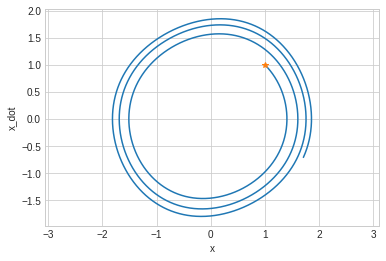

In [4]:
plt.plot(*zip(*Xs))
plt.plot(*zip(X0), '*')
plt.axis('equal');
plt.xlabel('x')
plt.ylabel(r'x_dot');

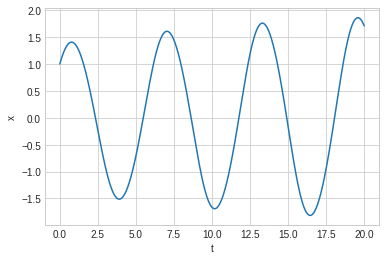

In [5]:
x1, y1 = zip(*Xs)
plt.plot(ts, x1)
# plt.plot(ts, y1)
plt.xlabel('t')
plt.ylabel('x');

In [17]:
#writing the general solution
def solver(x0, v0, tf=10, mu=0.1):

    X = np.array((x0, v0), dtype=float)
    X0 = np.array((x0, v0), dtype=float)
    t = 0
    dt =h =  1e-3

    steps = int((tf-t)/dt) #number of steps

    #lists to store values
    Xs = np.zeros((steps, 2))
    ts = np.zeros(steps)

    #inserting initial conditions
    Xs[0] = X
    ts[0] = t

    def f(t, X):
        x, v = X
        x_dot = v
        v_dot = mu*(1-x**2)*v - x

        return np.array((x_dot, v_dot))

    #solving the diffrential equation

    for step in range(steps):

        k1 = h*f(t, X)
        k2 = h*f(t+h/2, X+k1/2)
        k3 = h*f(t+h/2, X+k2/2)
        k4 = h*f(t+h, X+k3)

        k = (k1+2*k2+2*k3+k4)/6

        X += k
        t += h

        Xs[step] = X
        ts[step] = t
        
    return Xs, ts

Text(0.5, 1.0, 'x=0, v=2')

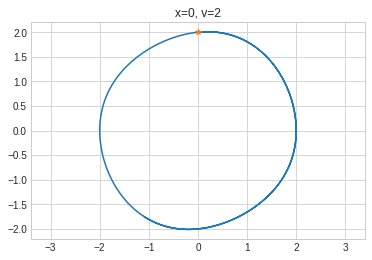

In [25]:
xs, ts = solver(0, 2, 10)
plt.plot(*zip(*xs))
plt.axis('equal');
plt.plot(0, 2, '*')
plt.title('x=0, v=2')

Text(0.5, 1.0, 'x=1, v=0')

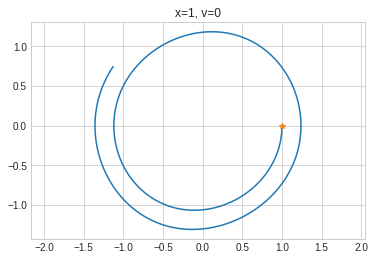

In [19]:
xs, ts = solver(1, 0, 10)
plt.plot(*zip(*xs))
plt.axis('equal');
plt.plot(1, 0, '*')
plt.title('x=1, v=0')

Text(0.5, 1.0, 'x=1, v=0')

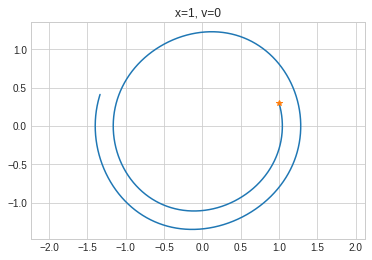

In [38]:
xs, ts = solver(1, 0.3, 10)
plt.plot(*zip(*xs))
plt.axis('equal');
plt.plot(1, 0.3, '*')
plt.title('x=1, v=0')

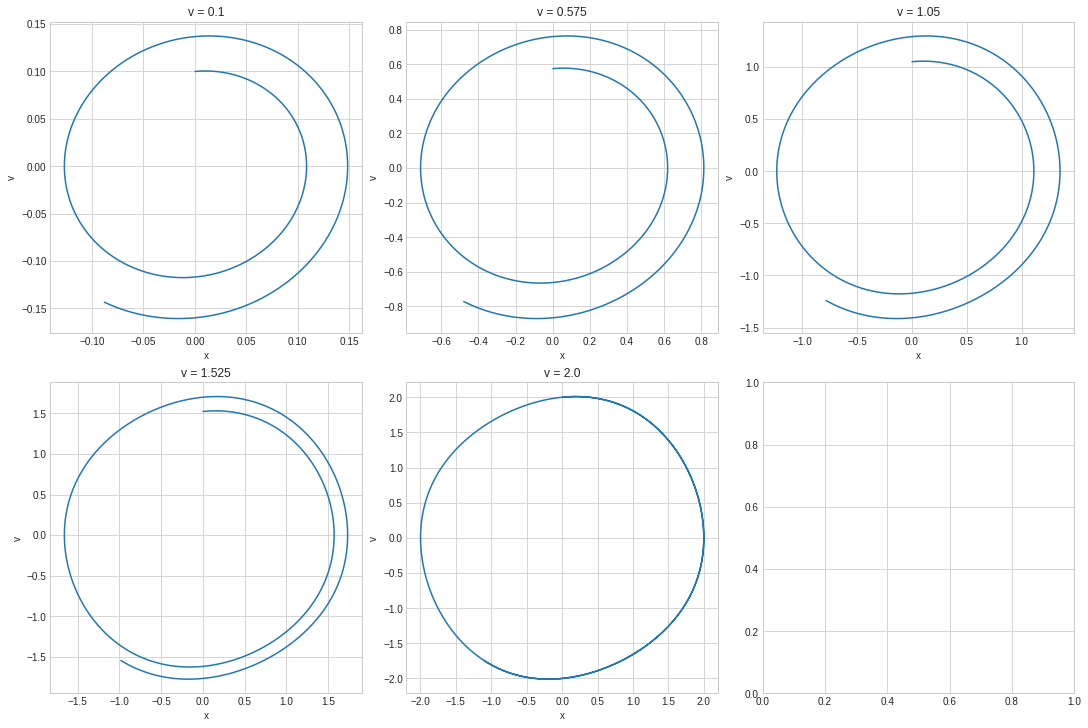

In [35]:
y10s = np.linspace(0.1, 2, 5)
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
        if k==5:
            continue
#         print(k)
        xs, ts = solver(0, y10s[k])
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'v = {y10s[k]}')
        axes[i][j].set_xlabel('x')
        axes[i][j].set_ylabel('v')

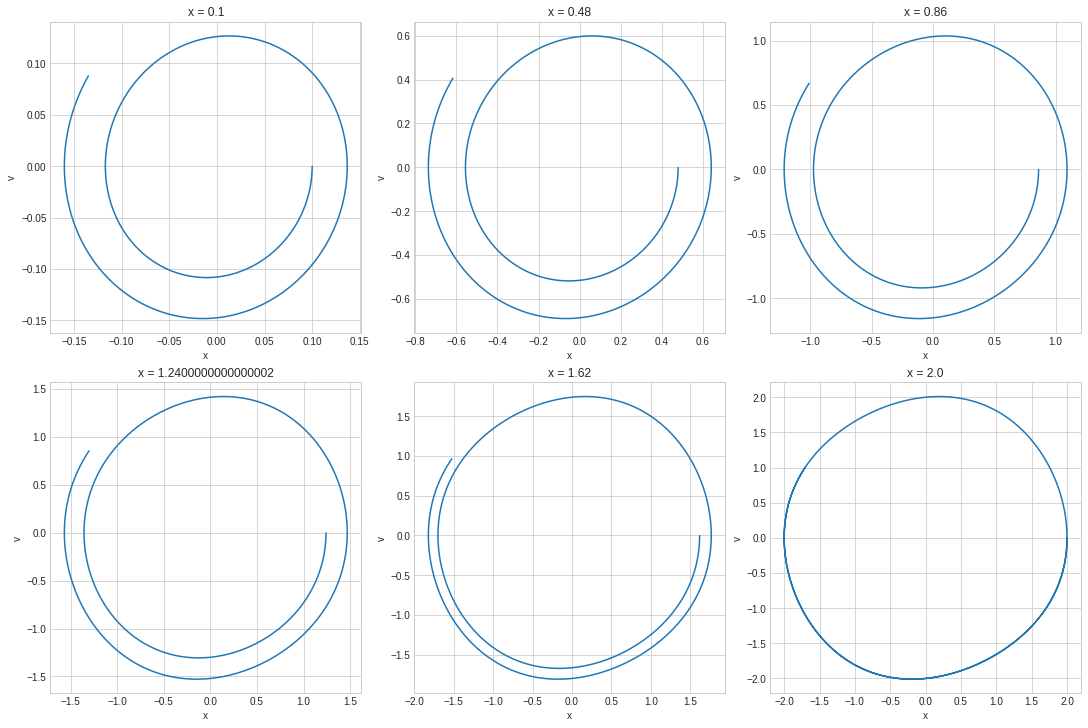

In [30]:
y10s = np.linspace(0.1, 2, 6)
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
#         print(k)
        xs, ts = solver(y10s[k], 0)
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'x = {y10s[k]}')
        axes[i][j].set_xlabel('x')
        axes[i][j].set_ylabel('v')

Text(0.5, 1.0, 'x=1, v=0')

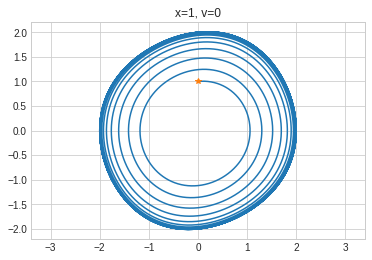

In [39]:
#motion at a later time t=100

xs, ts = solver(0, 1, tf = 100)
plt.plot(*zip(*xs))
plt.axis('equal');
plt.plot(0, 1, '*')
plt.title('x=1, v=0')

In [ ]:
xs, ts = solver(0, 1, tf = 100, mu=0.01)
plt.plot(*zip(*xs))
plt.axis('equal');
plt.plot(0, 1, '*')
plt.title('x=1, v=0')

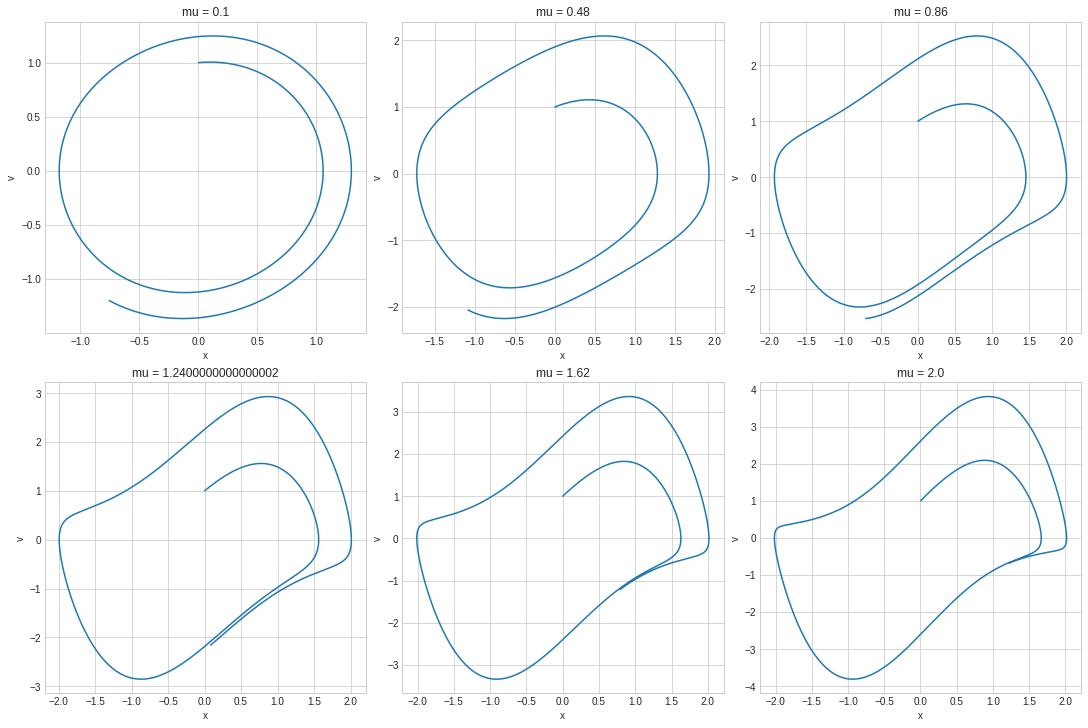

In [41]:
#for different mu
y10s = np.linspace(0.1, 2, 6)
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
#         print(k)
        xs, ts = solver(0,1,  mu = y10s[k])
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'mu = {y10s[k]}')
        axes[i][j].set_xlabel('x')
        axes[i][j].set_ylabel('v')

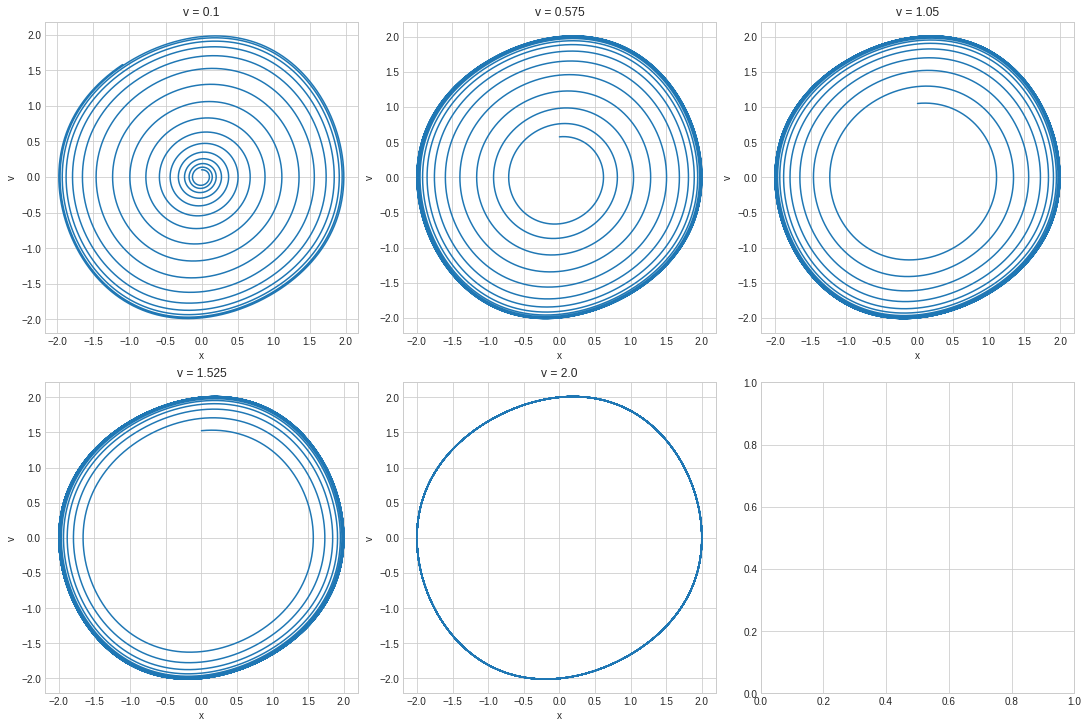

In [42]:
y10s = np.linspace(0.1, 2, 5)
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
        if k==5:
            continue
#         print(k)
        xs, ts = solver(0, y10s[k], tf = 100)
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'v = {y10s[k]}')
        axes[i][j].set_xlabel('x')
        axes[i][j].set_ylabel('v')

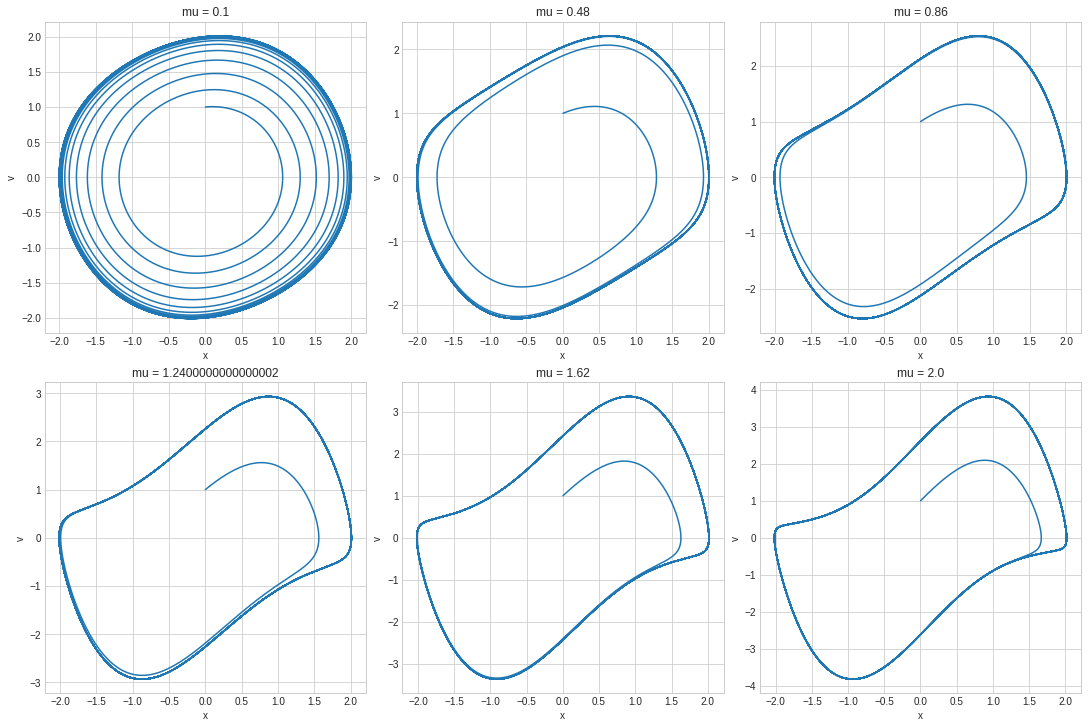

In [43]:
#for different mu
y10s = np.linspace(0.1, 2, 6)
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
#         print(k)
        xs, ts = solver(0,1,  tf =100,mu = y10s[k])
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'mu = {y10s[k]}')
        axes[i][j].set_xlabel('x')
        axes[i][j].set_ylabel('v')

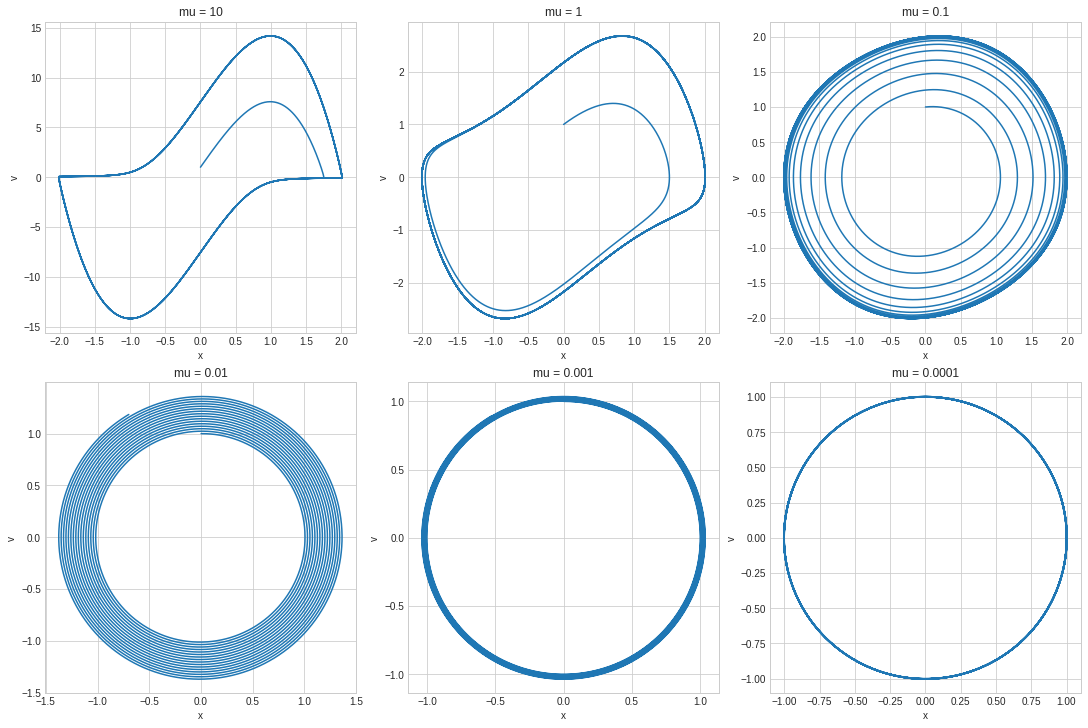

In [46]:
#mu -->0 limit
mus = [10,1,0.1, 0.01, 0.001, 0.0001]

fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
#         print(k)
        xs, ts = solver(0,1,  tf =100,mu = mus[k])
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'mu = {mus[k]}')
        axes[i][j].set_xlabel('x')
        axes[i][j].set_ylabel('v')